In [8]:
import json
import matplotlib.pyplot as plt

In [9]:
import torch

/tmp/ipykernel_3037413/3246134005.py:63: RuntimeWarning: divide by zero encountered in log2
  plt.xticks(range(len(y_mapping)), [np.log2(x) for x in y_mapping.keys()], rotation=90)
/tmp/ipykernel_3037413/3246134005.py:64: RuntimeWarning: divide by zero encountered in log2
  plt.yticks(range(len(x_mapping)), [np.log2(x) for x in x_mapping.keys()])


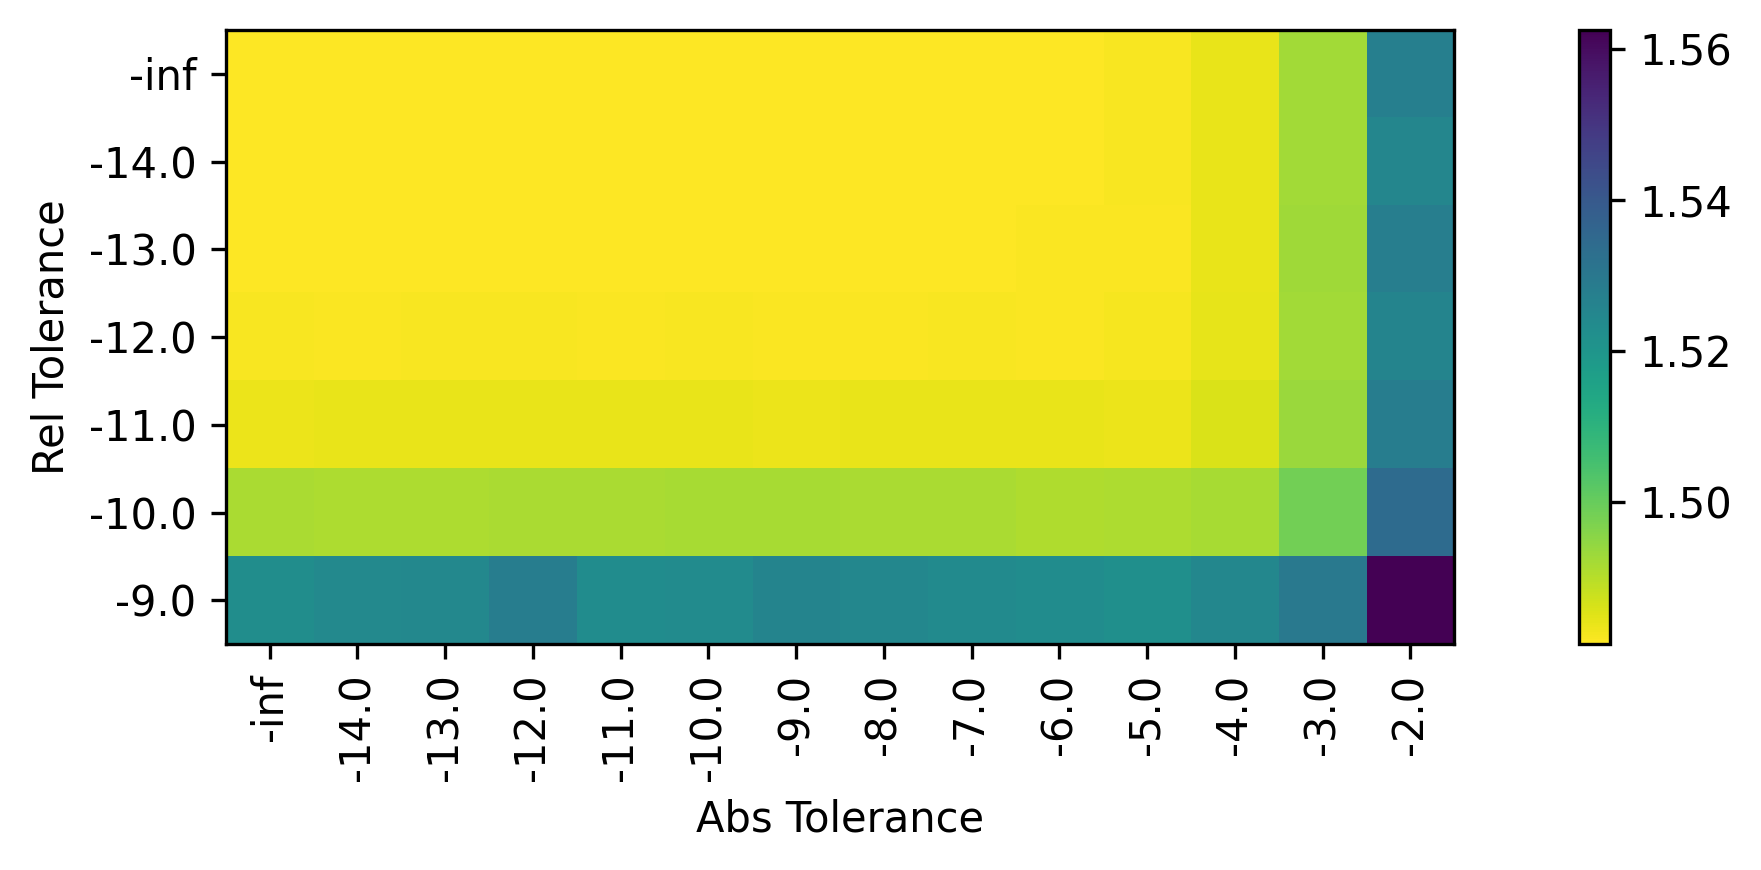

In [21]:
import numpy as np
from matplotlib.colors import LogNorm

filename = "/home/yongcha1/projects/NeuBytes/.logs/error_lm_3B.json"

with open(filename, "r") as f:
    data = json.load(f)


def get_xy_mapping(data):
    x_set = set()
    y_set = set()
    for entry in data.values():
        rel_tol = entry["rel_tol"]
        abs_tol = entry["abs_tol"]

        if rel_tol not in x_set:
            x_set.add(rel_tol)
        if abs_tol not in y_set:
            y_set.add(abs_tol)

    idx_x = {}
    idx_y = {}
    for x in sorted(list(x_set)):
        idx_x[x] = len(idx_x)

    for y in sorted(list(y_set)):
        idx_y[y] = len(idx_y)

    return idx_x, idx_y


x_mapping, y_mapping = get_xy_mapping(data)


grid = np.empty((len(x_mapping), len(y_mapping)))
grid.fill(np.nan)

for entry in data.values():
    rel_tol = entry["rel_tol"]
    abs_tol = entry["abs_tol"]
    results = float(entry["results"]["byte_level_perplexity"])

    grid[x_mapping[rel_tol], y_mapping[abs_tol]] = results

x_max_idx = 14
y_max_idx = 7


grid = grid[:x_max_idx, :y_max_idx]

y_mapping = {k: v for k, v in y_mapping.items() if v < y_max_idx}
x_mapping = {k: v for k, v in x_mapping.items() if v < x_max_idx}

# switch x and y
grid = grid.T
x_mapping, y_mapping = y_mapping, x_mapping

plt.figure(figsize=(9, 3))
im = plt.imshow(grid, cmap="viridis_r")
plt.colorbar(im, fraction=0.0225)

plt.xticks(range(len(y_mapping)), [np.log2(x) for x in y_mapping.keys()], rotation=90)
plt.yticks(range(len(x_mapping)), [np.log2(x) for x in x_mapping.keys()])
plt.xlabel("Abs Tolerance")
plt.ylabel("Rel Tolerance")
plt.show()

In [23]:
[{"Name":["Vanilla","Quant INT8","Quant FP4","Quant NF4","Quant FP4$^2$","Quant NF4$^2$","NeuZip 0-bit","NeuZip 1-bit","NeuZip 3-bit","NeuZip Lossless"]},{"PPL":[9.89,10.07,11.51,10.75,11.5,10.75,13.64,10.77,9.93,9.89]},{"Mem":[15.08,8.63,5.77,5.77,5.44,5.44,5.24,6.05,7.7,10.95]},{"Speed":[5.07,3.54,3.45,3.38,3.41,3.34,3.44,3.38,3.38,3.39]},{"PPL2":[10.87,10.97,11.38,11.15,11.38,11.15,12.46,11.17,10.9,10.87]},{"Mem2":[24.36,12.74,7.37,7.37,6.87,6.87,6.3,7.77,10.73,16.66]},{"Speed2":[3.59,2.27,1.87,1.83,1.86,1.81,1.87,1.86,1.84,1.84]},{"PPL3":["-",10.87,11.57,11.06,11.57,11.06,12.06,11.04,10.76,10.72]},{"Mem3":["OOM",33.41,19.54,19.54,18.11,18.11,16.2,20.14,27.92,43.4]},{"Speeed3":["-",1.13,1.75,1.67,1.61,1.54,0.94,0.93,0.93,0.94]}]

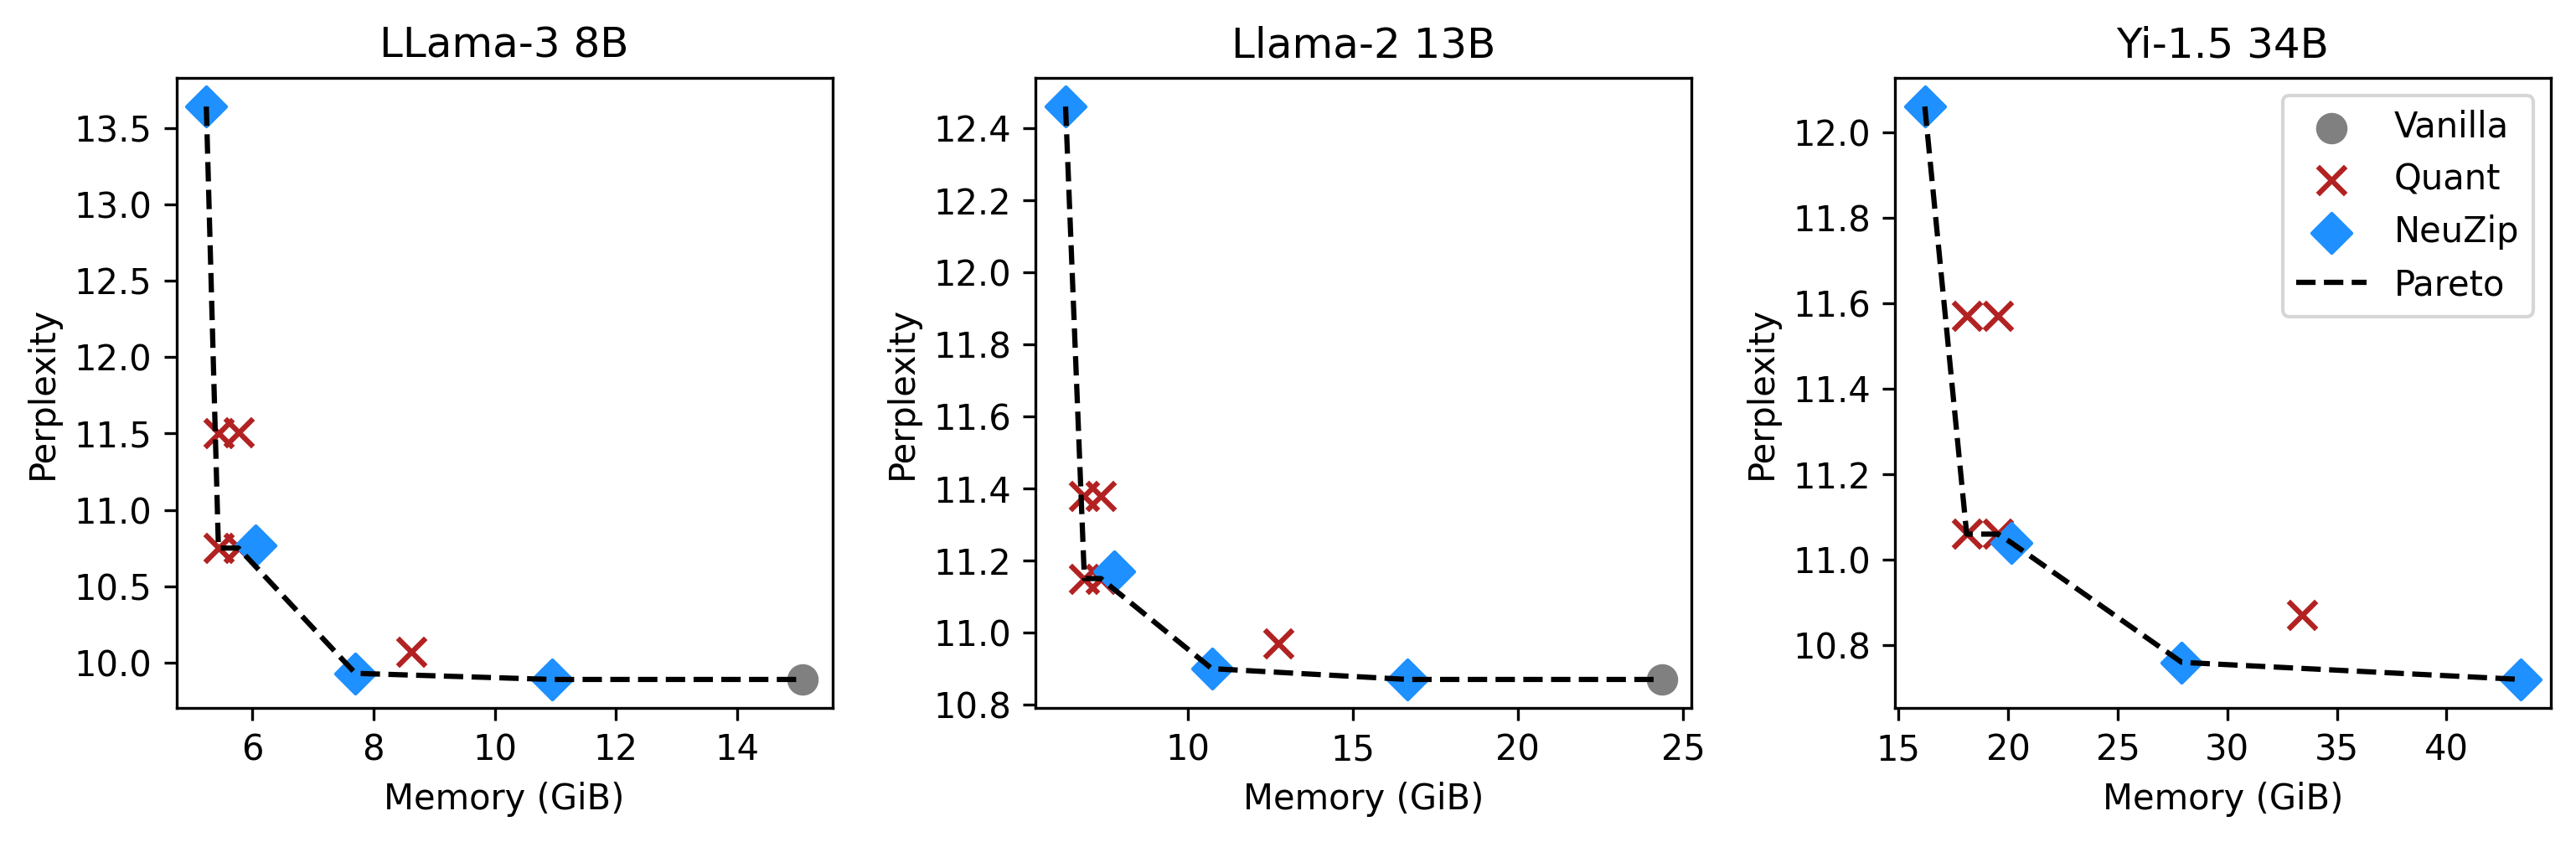

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    "Name": [
        "Vanilla",
        "Quant INT8",
        "Quant FP4",
        "Quant NF4",
        "Quant FP4$^2$",
        "Quant NF4$^2$",
        "NeuZip 0-bit",
        "NeuZip 1-bit",
        "NeuZip 3-bit",
        "NeuZip Lossless",
    ],
    "PPL": [9.89, 10.07, 11.51, 10.75, 11.5, 10.75, 13.64, 10.77, 9.93, 9.89],
    "Mem": [15.08, 8.63, 5.77, 5.77, 5.44, 5.44, 5.24, 6.05, 7.7, 10.95],
    "Speed": [5.07, 3.54, 3.45, 3.38, 3.41, 3.34, 3.44, 3.38, 3.38, 3.39],
    "PPL2": [10.87, 10.97, 11.38, 11.15, 11.38, 11.15, 12.46, 11.17, 10.9, 10.87],
    "Mem2": [24.36, 12.74, 7.37, 7.37, 6.87, 6.87, 6.3, 7.77, 10.73, 16.66],
    "Speed2": [3.59, 2.27, 1.87, 1.83, 1.86, 1.81, 1.87, 1.86, 1.84, 1.84],
    "PPL3": ["-", 10.87, 11.57, 11.06, 11.57, 11.06, 12.06, 11.04, 10.76, 10.72],
    "Mem3": ["OOM", 33.41, 19.54, 19.54, 18.11, 18.11, 16.2, 20.14, 27.92, 43.4],
    "Speed3": ["-", 1.13, 1.75, 1.67, 1.61, 1.54, 0.94, 0.93, 0.93, 0.94],
}

names = data["Name"]
labels = ["Vanilla", "Quant", "NeuZip"]


colors = ["gray", "firebrick", "dodgerblue", "darkseagreen"]
dots = ["o", "x", "D", "^", "s",  "<", ">", "1", "2", "3", "4", "8", "p", "P",  "h", "H", "+", "x", "X", "D", "d", "|", "_"]

label_to_color = {label: color for label, color in zip(labels, colors)}
label_to_dot = {label: dot for label, dot in zip(labels, dots)}
# use tight layout
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'figure.dpi': 300})
fig, axes = plt.subplots(1, 3, figsize=(9*1.15, 3*1.15))
for i in range(3):
    if i == 0:
        mem_col = "Mem"
        ppl_col = "PPL"
        title = "LLama-3 8B"
    elif i == 1:
        mem_col = "Mem2"
        ppl_col = "PPL2"
        title = "Llama-2 13B"
    elif i == 2:
        mem_col = "Mem3"
        ppl_col = "PPL3"
        title = "Yi-1.5 34B"

    ploted_x = []
    ploted_y = []
    for label in labels:
        color = label_to_color[label]
        dot = label_to_dot[label]
        x = [d for n, d in zip(names, data[mem_col]) if n.startswith(label)]
        y = [d for n, d in zip(names, data[ppl_col]) if n.startswith(label)]

        x = [x for x, _ in list(zip(x, y)) if x != "OOM"]
        y = [y for x, y in list(zip(x, y)) if x != "OOM"]

        axes[i].scatter(x=x, y=y, c=color, label=label, marker=dot, alpha=1.0, s=64)
        axes[i].set_xlabel("Memory (GiB)")
        axes[i].set_ylabel("Perplexity")
        # axes[i].set_ylim(9, 15)
        axes[i].set_title(title)
        

        ploted_x.extend(x)
        ploted_y.extend(y)
    
    pareto_frontier = []
    # smaller is better for both
    for x, y in zip(ploted_x, ploted_y):
        dominated = False
        for x_, y_ in zip(ploted_x, ploted_y):
            if x_ <= x and y_ < y and (x_ < x or y_ < y):
                dominated = True
                break
        if not dominated:
            pareto_frontier.append((x, y))  
    pareto_frontier = sorted(pareto_frontier, key=lambda x: x[0])
    pareto_frontier_x = [x for x, _ in pareto_frontier]
    pareto_frontier_y = [y for _, y in pareto_frontier]
    axes[i].plot(pareto_frontier_x, pareto_frontier_y, c='black', label='Pareto', linestyle='--')
    
    


plt.legend()
plt.show()